In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "csv_files/mouse_drug_data.csv"
clinical_trial_data_to_load = "csv_files/clinicaltrial_data.csv"


In [4]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

In [5]:
# Combine the data into a single dataset
data_complete = pd.merge(mouse_data, clinical_data, how="left", on=["Mouse ID"]) 

# Display the data table for preview
data_complete.head(10)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


In [6]:
#TUMOR RESPONSE TO TREATMENT

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_groups = data_complete.groupby(['Drug', 'Timepoint'])
tumor_mean = drug_groups.mean()

# Convert to DataFrame
tumor_mean_df = pd.DataFrame(tumor_mean['Tumor Volume (mm3)'])

# Preview DataFrame
tumor_mean_df.head(15)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049

In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = drug_groups.sem()

# Convert to DataFrame
tumor_sem_df = pd.DataFrame(tumor_sem['Tumor Volume (mm3)'])

# Preview DataFrame
tumor_sem_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [8]:
# Minor Data Munging to Re-Format the Data Frames
data_pivot = pd.pivot_table(tumor_mean_df,index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
data_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [9]:
# create pivot table for standard errors

sem_pivot = pd.pivot_table(tumor_sem_df,index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


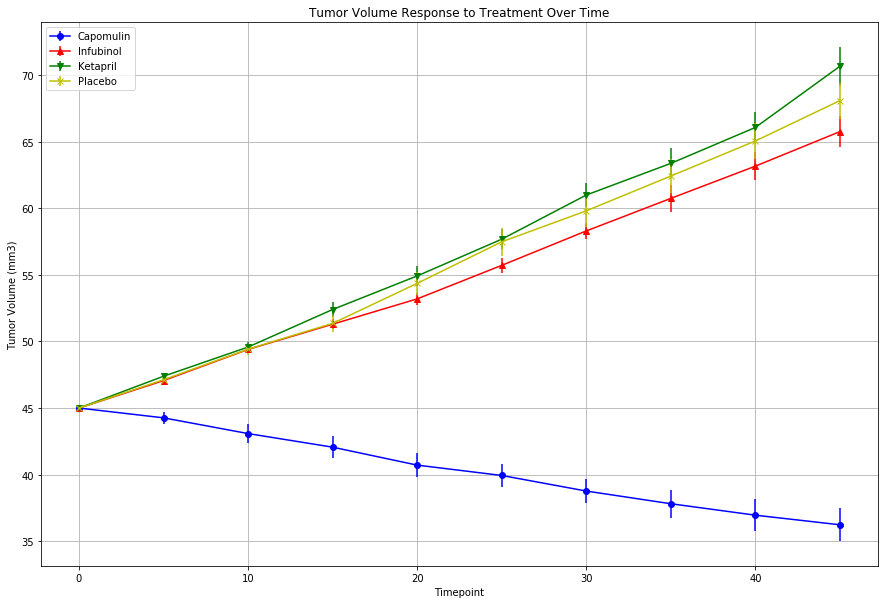

In [10]:
# Generate the Plot (with Error Bars)

x_axis = data_pivot.index
drug_names = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers = ['o', '^', 'v', 'x']
colors = ['b', 'r', 'g', 'y']

plt.figure(figsize=(15,10))

for x in range(4):
    plt.errorbar(x_axis, data_pivot[drug_names[x]], yerr=sem_pivot[drug_names[x]], marker=markers[x], color=colors[x], label=drug_names[x])

plt.grid()
plt.legend(loc='best')
plt.title("Tumor Volume Response to Treatment Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

#Save graph
plt.savefig("images/tumor_vol_graph.png")

plt.show()

In [11]:
# METASTATIC RESPONSE TO TREATMENT

# Store the Mean Met. Site Data Grouped by Drug and Timepoint
# Convert to DataFrame
metastatic_mean_df = pd.DataFrame(tumor_mean['Metastatic Sites'])

# Preview DataFrame
metastatic_mean_df.head(15)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111

In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame
metastatic_sem_df = pd.DataFrame(tumor_sem['Metastatic Sites'])

# Preview DataFrame
metastatic_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [13]:
# Minor Data Munging to Re-Format the Data Frames
meta_pivot = pd.pivot_table(metastatic_mean_df,index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
meta_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [14]:
# create pivot table for standard errors

meta_sem_pivot = pd.pivot_table(metastatic_sem_df,index='Timepoint', columns='Drug', values='Metastatic Sites')
meta_sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


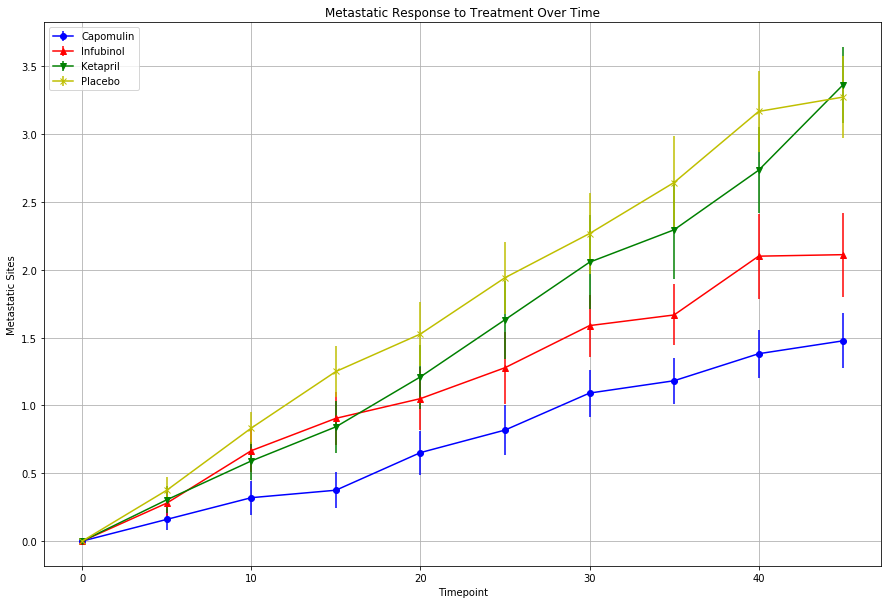

In [15]:
# Generate the Plot (with Error Bars)

x_axis = meta_pivot.index
drug_names = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers = ['o', '^', 'v', 'x']
colors = ['b', 'r', 'g', 'y']

plt.figure(figsize=(15,10))

for x in range(4):
    plt.errorbar(x_axis, meta_pivot[drug_names[x]], yerr=meta_sem_pivot[drug_names[x]], marker=markers[x], color=colors[x], label=drug_names[x])

plt.grid()
plt.legend(loc='best')
plt.title("Metastatic Response to Treatment Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Metastatic Sites")

#Save graph
plt.savefig("images/metastatic_graph.png")

plt.show()

In [16]:
# SURVIVAL RATES

# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = drug_groups.count()

# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count['Mouse ID'])

# Preview DataFrame
mice_count_df.head(15)

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
          25               22
          30               22
          35               22
          40               21
          45               21
Ceftamin  0                25
          5                21
          10               20
          15               19
          20               18

In [17]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_pivot = pd.pivot_table(mice_count_df,index='Timepoint', columns='Drug', values='Mouse ID')


# Preview the Data Frame
mice_count_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


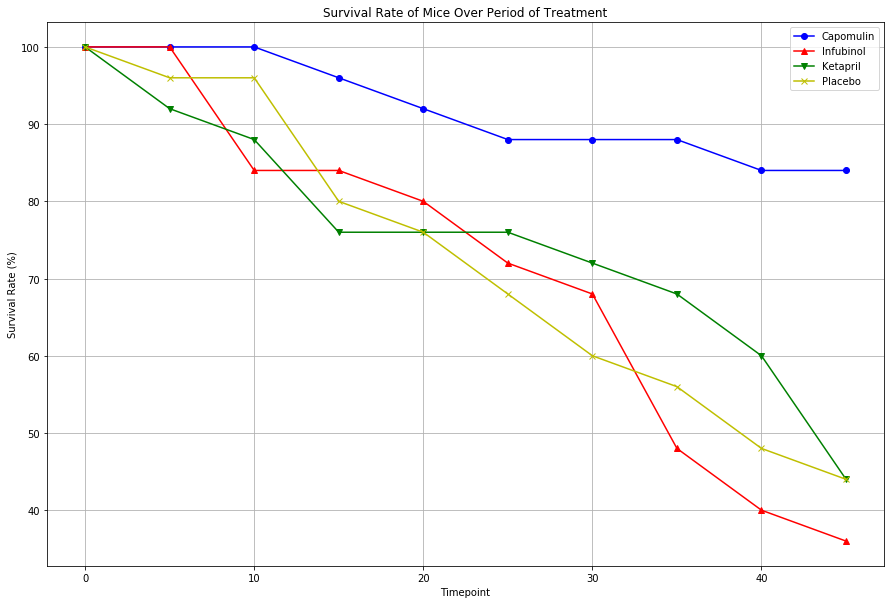

In [18]:
# Generate the Plot (Accounting for percentages)

x_axis = mice_count_pivot.index
drug_names = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers = ['o', '^', 'v', 'x']
colors = ['b', 'r', 'g', 'y']

plt.figure(figsize=(15,10))

for x in range(4):
    plt.plot(x_axis, (mice_count_pivot[drug_names[x]])/max(mice_count_pivot[drug_names[x]].values)*100, marker=markers[x], color=colors[x], label=drug_names[x])

plt.grid()
plt.legend(loc='best')
plt.title("Survival Rate of Mice Over Period of Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Survival Rate (%)")

#Save graph
plt.savefig("images/survival_graph.png")

plt.show()

In [19]:
data_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [20]:
# SUMMARY BAR GRAPH

# Calculate the percent changes for each drug
volume_percent_change = (data_pivot.iloc[-1]-data_pivot.iloc[0])/data_pivot.iloc[0] *100


# Display the data to confirm
volume_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

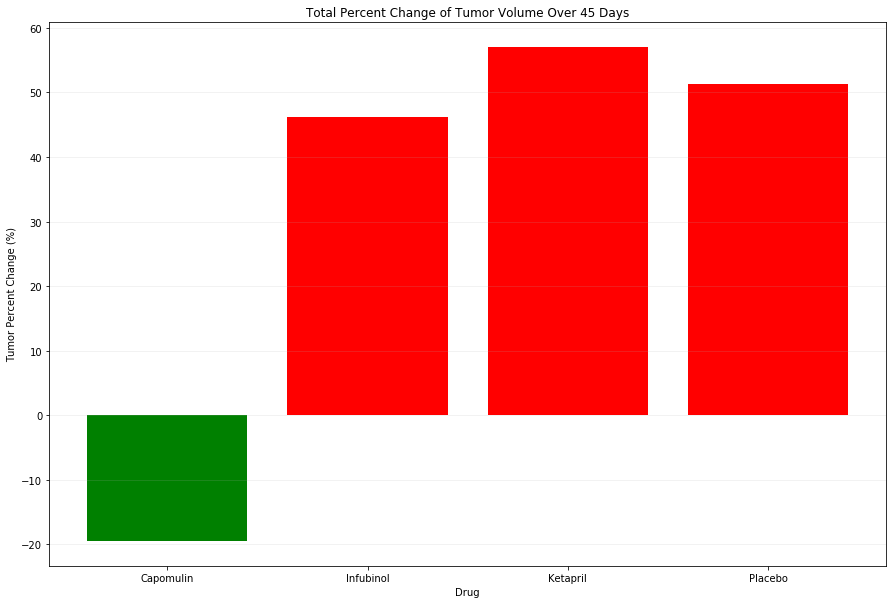

In [21]:
# Store all Relevant Percent Changes into a Tuple

drug_names = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
percent_change = []

for drug in drug_names:
    percent_change.append(volume_percent_change.loc[drug])


# Splice the data between passing and failing drugs

colors = []

for value in percent_change:
    if value > 0:
        colors.append('r')
    else:
        colors.append('g')


# Orient widths. Add labels, tick marks, etc.

plt.figure(figsize=(15,10))

plt.bar(drug_names, percent_change, color=colors, align="center")

plt.grid(axis='y', alpha=0.2)
plt.title("Total Percent Change of Tumor Volume Over 45 Days")
plt.xlabel("Drug")
plt.ylabel("Tumor Percent Change (%)")


#Save graph
plt.savefig("images/tumor_percent_change_graph.png")

plt.show()
